#  Classification : Nearest Neighbors and Naive Bayes 

## Classification using Nearest Neighbors

(a) Perform k-Nearest neighbours on the given dataset($X_{knn}$ and $y_{knn}$: where $X_{knn}$ stores feature vectors representing the movies and  $y_{knn}$ stores the 0-1 labelling for each movie) for binary classification of movies, for classifiying whether a given movie is a comedy(label 1) or not a comedy(label 0) . Split the dataset into train(80%), validation(10%) and test sets(10%).Run k-Nearest neighbours for different k values (1,3,7,15,31,63). Select the k, using validation set, which returns the best accuracy score. 

(i)  Report all the validation accuracies for all the values of k. 
<br>(ii) Report accuracy score by performing k-NN on the test dataset using the best chosen k value. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import heapq

sns.set()

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
X = np.genfromtxt("X_knn.csv", delimiter=" ")
y = np.genfromtxt("y_knn.csv", delimiter=" ")

<IPython.core.display.Javascript object>

In [3]:
print(X.shape)
print(y.shape)

(10000, 1128)
(10000,)


<IPython.core.display.Javascript object>

In [4]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 - train_ratio, random_state=2020
)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=test_ratio / (test_ratio + val_ratio)
)

<IPython.core.display.Javascript object>

In [5]:
print("Train Data Shape :", X_train.shape)
print("Validate Data Shape :", X_val.shape)
print("Test Data Shape :", X_test.shape)

Train Data Shape : (8000, 1128)
Validate Data Shape : (1000, 1128)
Test Data Shape : (1000, 1128)


<IPython.core.display.Javascript object>

In [10]:
# Note : This is a rough implementation of KNN, thus prediction will take a lot of time.

class KNN:
    def __init__(self, k):
        self.k = k

    def dist(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def train(self, X, y):
        self.dataset = np.append(X, y.reshape(-1, 1), axis=1)

    def predict(self, X_t):
        preds = []
        for i in X_t:
            dist = []
            for j in self.dataset:
                dist.append((self.dist(i, j[:-1]), j))
            dist_n = heapq.nsmallest(self.k, dist, key=lambda x: x[0])
            vals = []
            for i in dist_n:
                vals.append(i[1][-1])
            preds.append(np.argmax(np.bincount(np.array(vals).astype("int64"))))
        return np.array(preds).astype("float64")

<IPython.core.display.Javascript object>

In [11]:
k_vals = [1, 3, 7, 15, 31, 63]
val_scores = []
models = []
for k in k_vals:
    print("Training KNN model with n_neighbors =", k)
    model = KNN(k=k)
    model.train(X_train, y_train)
    acc = np.sum(model.predict(X_val) == y_val) / len(y_val)
    models.append(model)
    val_scores.append(acc)

Training KNN model with n_neighbors = 1
Training KNN model with n_neighbors = 3
Training KNN model with n_neighbors = 7
Training KNN model with n_neighbors = 15
Training KNN model with n_neighbors = 31
Training KNN model with n_neighbors = 63


<IPython.core.display.Javascript object>

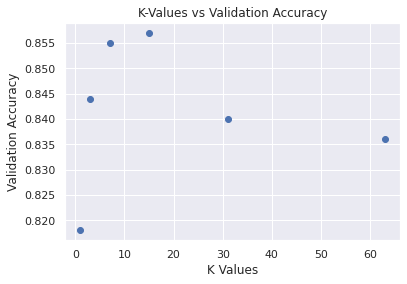

<IPython.core.display.Javascript object>

In [20]:
plt.scatter(k_vals, val_scores)
plt.title("K-Values vs Validation Accuracy")
plt.xlabel("K Values")
plt.ylabel("Validation Accuracy")
plt.show()

In [14]:
best_model = models[val_scores.index(max(val_scores))]
print(
    "Model with best validation accuracy is with model with n_neighbours =",
    best_model.k,
    "with validation acuracy =",
    max(val_scores),
)

Model with best validation accuracy is with model with n_neighbours = 15 with validation acuracy = 0.857


<IPython.core.display.Javascript object>

In [15]:
test_acc = np.sum(best_model.predict(X_test) == y_test) / len(y_test)
print("Test accuracy =", test_acc)

Test accuracy = 0.845


<IPython.core.display.Javascript object>

- Validation Accuracy = 0.857

- Test Accuracy = 0.845

- n_neighbours parameter for best model = 15

(b) State why using an even value of k in k-NN should not be chosen

A) Since KNN tries to classify using the prediction of k neighbours, if k is even then there is a chance that there might be a tie which causes additional problems of tie-breaks. To prevent that from happening we prevent using even value of k.

## Learning Naive Bayes' classifier  

### From Continuous Distribution of data

Here, the distribution of the data( $X$ represents the datapoints and $Y$ represents the 0-1 binary-class label; where 0 being the negative class and 1 being the positive class) is already known.
<br>Consider the following one-dimensional(1-D) Gaussian distributions where means and variances are unknown. You need to estimate means($\mu_-$: for negative class and  $\mu_+$: for positive class) and variances ($\sigma^{2}_{-}$: for negative class and $\sigma^{2}_+$: for positive class) from the given data : 
<br> (1) Assume $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ 
<br>(2) Assume $X|Y_{Y=1} \sim \mathcal{N}(\mu_+ , \sigma^{2}_+)$


*Generating artificial datasets in the next cell*

In [2]:
## This cell is for generating datasets. Students should not change anything in this cell.
## You can compare your mean and variance estimates by the actual ones used to generate these datasets

X_pos = np.random.randn(1000, 1) + np.array([[2.0]])
X_neg = np.random.randn(1000, 1) + np.array([[4.0]])
X_train_pos = X_pos[:900]
X_train_neg = X_neg[:900]
X_test_pos = X_pos[900:]
X_test_neg = X_neg[900:]
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_train = np.concatenate((np.ones(900), np.zeros(900)))
Y_test = np.concatenate((np.ones(100), np.zeros(100)))

## X_train, X_test, Y_train, Y_test are your datasets to work with ####

<IPython.core.display.Javascript object>



<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Utilize the training dataset to estimate the means($\hat{\mu_+}$,$\hat{\mu_-}$) and variances($\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$) for both positive and negative classes  
b)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$ 
<br>c)Estimate the classifier funtion/posterior probability:  $P(Y=1|X = x)$  ⟶ which could be referred to as $\hat{\eta(x)}$
<br>d)Find out the threshold value($x^*$) for classification by equating the estimated classifier function($\hat{\eta(x)}$)  with threshold probability of 0.5
<br>e)Classify the test dataset into the two classes using this threshold value($x^*$) and find out the **accuracy** of the prediction 

Return back:  $\hat{\mu_+}$, $\hat{\mu_-}$, $\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$, $\hat{a}$, $x^*$ and accuracy from the code written 

*Hint: $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ implies $P_{X|Y=0} = \mathcal{N}(\mu_- , \sigma^{2}_-) $*


In [5]:
mu_pos = np.mean(X_train[Y_train == 1])
mu_neg = np.mean(X_train[Y_train == 0])

var_pos = np.var(X_train[Y_train == 1])
var_neg = np.var(X_train[Y_train == 0])

P_1 = np.sum(Y_train == 1) / len(Y_train)
P_0 = 1 - P_1

<IPython.core.display.Javascript object>

We know the classifier function from the below

$\hat{\eta(x)}$ = $\frac{P(Y=1)P_{X|Y=1}}{P(Y=1)P_{X|Y=1}+P(Y=0)P_{X|Y=0}}$ = $\frac{\frac{1}{\sqrt{2\pi\sigma^{2}_+}}e^{\frac{(x-\mu_+)^2}{2\sigma^2_+}}}{\frac{1}{\sqrt{2\pi\sigma^{2}_+}}e^{\frac{(x-\mu_+)^2}{2\sigma^2_+}} + \frac{1}{\sqrt{2\pi\sigma^{2}_-}}e^{\frac{(x-\mu_-)^2}{2\sigma^2_-}}}$ ; (Since P(Y=1)=P(Y=0))

$\implies$ when $x = x^*$, $\hat{\eta(x)}=0.5$

$\implies 0.5 = \frac{\frac{1}{\sqrt{2\pi\sigma^{2}_+}}e^{\frac{(x^*-\mu_+)^2}{2\sigma^2_+}}}{\frac{1}{\sqrt{2\pi\sigma^{2}_+}}e^{\frac{(x^*-\mu_+)^2}{2\sigma^2_+}} + \frac{1}{\sqrt{2\pi\sigma^{2}_-}}e^{\frac{(x^*-\mu_-)^2}{2\sigma^2_-}}} \implies \frac{1}{\sqrt{2\pi\sigma^{2}_+}}e^{\frac{(x^*-\mu_+)^2}{2\sigma^2_+}} = \frac{1}{\sqrt{2\pi\sigma^{2}_-}}e^{\frac{(x^*-\mu_-)^2}{2\sigma^2_-}}$ 
$\implies \left(\frac{1}{\sigma^2_+} - \frac{1}{\sigma^2_-}\right)(x^{*2})-\left(\frac{\mu_+}{\sigma_+^2} - \frac{\mu_-}{\sigma_-^2}\right)x^*+\left(\frac{\mu_+^2}{2\sigma_-^2} - \frac{\mu_-^2}{2\sigma_+^2} - log\left(\frac{\sigma_-}{\sigma_+}\right)\right) = 0$


Thus we have to find the roots of above equation to get the threshold $x^*$

In [6]:
# Function to solve for x*
def solve(mu1, mu2, sig1, sig2):
    a = 1 / (2 * sig1 ** 2) - 1 / (2 * sig2 ** 2)
    b = mu2 / (sig2 ** 2) - mu1 / (sig1 ** 2)
    c = mu1 ** 2 / (2 * sig1 ** 2) - mu2 ** 2 / (2 * sig2 ** 2) - np.log(sig2 / sig1)
    return np.roots([a, b, c])

<IPython.core.display.Javascript object>

In [7]:
x_ans = solve(mu_pos, mu_neg, np.sqrt(var_pos), np.sqrt(var_neg))[1]

<IPython.core.display.Javascript object>

In [8]:
# Calculating the prediction and accuracy
preds = np.array([1 if i < x_ans else 0 for i in X_test])

acc = np.sum(preds == Y_test) / len(preds)

<IPython.core.display.Javascript object>

In [14]:
print("mu_pos :", mu_pos)
print("mu_neg :", mu_neg, "\n")

print("var_pos :", var_pos)
print("var_neg :", var_neg, "\n")

print("P(Y=1) :", P_1)
print("P(Y=0) :", P_0, "\n")

print(
    "Threshold = ",
    x_ans,
    "; Classifying points on the left of threshold as Y=1 and right as Y=0",
    "\n",
)

print("Accuracy of prediction =", acc)

mu_pos : 1.9579124565154016
mu_neg : 4.001017840559742 

var_pos : 1.0226604589023025
var_neg : 1.0157214844237124 

P(Y=1) : 0.5
P(Y=0) : 0.5 

Threshold =  2.979505781069792 ; Classifying points on the left of threshold as Y=1 and right as Y=0 

Accuracy of prediction = 0.905


<IPython.core.display.Javascript object>

### From Discrete distribution of data

Unlike the first exercise for learning the Naive Bayes' classifier where we dealt with continuous distribution of data, here you need to work with discrete data, which means finding Probability Mass Distribution(PMF). 

Age  | Income | Status  | Buy
-----|--------|-------- |----
<=20 |  low   | students| yes
<=20 |  high  | students| yes
<=20 | medium | students| no
<=20 | medium | married | no
<=20 |  high  | married | yes
21-30|  low   | married | yes
21-30|  low   | married | no 
21-30| medium | students| no
21-30|  high  | students| yes
 >30 |  high  | married | no
 >30 |  high  | married | yes
 >30 | medium | married | yes
 >30 | medium | married | no
 >30 | medium | students| no
 
Consider the train dataset above. Take any random datapoint ($X_{i}$) where $X_{i} = (X_{i,1} = Age,X_{i,2} = Income,X_{i,3} = Status)$ and its corresponding label 

($Y_{i} = Buy$). A "yes" in Buy corresponds to label-1 and a "no" in Buy corresponds to label-0.

<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$   
b)Estimate the likelihood for each feature:  $P(X_{i,j} = x |Y = y_{i})$, where $ i$=datapoint counter, $j \in \{1,2,3\}$ and $y_{i} \in \{0,1\}$ 
<br>c)Estimate the total likelihood: $P(X_{i} = x |Y = y_{i})$  
d)Calculate the posterior probability: $P(Y = 1|X_{i} = x_{test} )$ = $p_{test}$ where $x_{test} = (Age = 21-30, Income= medium, Status = married)$


Return back: $\hat{a}$, total likelihood and $p_{test}$ 


In [27]:
# Note : I've generated the pmf data into a tsv file - pmf_data.tsv

data = pd.read_csv("pmf_data.tsv", sep="\t")

P_1 = np.sum(data["Buy"] == "yes") / len(data)
P_0 = 1 - P_1

# Probability Dictonary

P_probab = {"yes": {}, "no": {}}

# Features

age_set = set(data["Age"])
income_set = set(data["Income"])
status_set = set(data["Status"])

# Age

for i in age_set:
    P_probab["yes"][i] = np.sum((data["Age"] == i) & (data["Buy"] == "yes")) / (
        len(data) * P_1
    )
    P_probab["no"][i] = np.sum((data["Age"] == i) & (data["Buy"] == "no")) / (
        len(data) * P_0
    )

# Income

for i in income_set:
    P_probab["yes"][i] = np.sum((data["Income"] == i) & (data["Buy"] == "yes")) / (
        len(data) * P_1
    )
    P_probab["no"][i] = np.sum((data["Income"] == i) & (data["Buy"] == "no")) / (
        len(data) * P_0
    )

# Status

for i in status_set:
    P_probab["yes"][i] = np.sum((data["Status"] == i) & (data["Buy"] == "yes")) / (
        len(data) * P_1
    )
    P_probab["no"][i] = np.sum((data["Status"] == i) & (data["Buy"] == "no")) / (
        len(data) * P_0
    )

# Probability with all features

P_total = {"yes": {}, "no": {}}

for i in age_set:
    for j in income_set:
        for k in status_set:
            P_total["yes"][i + "_" + j + "_" + k] = (
                P_probab["yes"][i] * P_probab["yes"][j] * P_probab["yes"][k]
            )
            P_total["no"][i + "_" + j + "_" + k] = (
                P_probab["no"][i] * P_probab["no"][j] * P_probab["no"][k]
            )


print("â =", P_1, "\n")


print("Y='yes'")
print("-------")
for i in age_set:
    for j in income_set:
        for k in status_set:
            ans_print = (
                "P(Age=" + i + "\t;Income=" + j + "\t;Status=" + k + "\t|Y=yes" + ") = "
            )
            print(
                ans_print.expandtabs(9),
                P_total["yes"][i + "_" + j + "_" + k],
                end="\n",
                sep="",
            )
print()
print("Y='no'")
print("------")
for i in age_set:
    for j in income_set:
        for k in status_set:
            ans_print = (
                "P(Age=" + i + "\t;Income=" + j + "\t;Status=" + k + "\t|Y=no " + ") = "
            )
            print(
                ans_print.expandtabs(9),
                P_total["no"][i + "_" + j + "_" + k],
                end="\n",
                sep="",
            )


p_test_case = "21-30_medium_married"
p_test = P_total["yes"][p_test_case] / (
    P_total["yes"][p_test_case] + P_total["no"][p_test_case]
)

print("\np_test =", p_test)

â = 0.5 

Y='yes'
-------
P(Age=<=20        ;Income=low       ;Status=students  |Y=yes) = 0.05247813411078716
P(Age=<=20        ;Income=low       ;Status=married   |Y=yes) = 0.06997084548104955
P(Age=<=20        ;Income=medium    ;Status=students  |Y=yes) = 0.02623906705539358
P(Age=<=20        ;Income=medium    ;Status=married   |Y=yes) = 0.034985422740524776
P(Age=<=20        ;Income=high      ;Status=students  |Y=yes) = 0.10495626822157432
P(Age=<=20        ;Income=high      ;Status=married   |Y=yes) = 0.1399416909620991
P(Age=21-30       ;Income=low       ;Status=students  |Y=yes) = 0.034985422740524776
P(Age=21-30       ;Income=low       ;Status=married   |Y=yes) = 0.0466472303206997
P(Age=21-30       ;Income=medium    ;Status=students  |Y=yes) = 0.017492711370262388
P(Age=21-30       ;Income=medium    ;Status=married   |Y=yes) = 0.02332361516034985
P(Age=21-30       ;Income=high      ;Status=students  |Y=yes) = 0.06997084548104955
P(Age=21-30       ;Income=high      ;Status=marri

<IPython.core.display.Javascript object>